# Задание
*Третьему варианту не повезло - слишком лёгкое задание выпало!*

Имеется робот, который управляется инопланетянами последовательностями 
инопланетных звуков.  

Он может двигаться влево(L),вправо(R),вперед(F),назад(B) и стоять(S).
История звуков-команд и движений робота есть  
Задача - сделать две программы для анализа этих последовательностей.  

Программа 1. Создать и обучить программу, которая по полученной 
последовательности звуков будет предсказывать, куда будет двигаться робот.  
Обучить, определить точность прогноза.  
Параметры обучения сохранить во внешнем файле.  

Программа 2. Написать программу, которая по полученной последовательности звуков будет предсказывать, куда будет двигаться робот.  
Использует параметры обучения, сохраненные первой программой  

Тренировочный файл - ```train.txt```


# Программа 1

## Составление тренировочных данных

In [ ]:
dataset = open('train.txt')
X_train = []
y_train = []
alphabet = "abcdefghijklmnopqrstuvwxyz"
seq_length = 100
commands = {'L': [], 'R': [], 'F': [], 'B': [], 'S': []}

for line in dataset:
  command = line.split()[0]
  movement  = line.split()[1]
  commands[movement].append(command)

  digits_command = []
  digit_movements = {'L': 1, 'R': 2, 'F': 3, 'B': 4, 'S': 5}
  digit_movement = 5

  # X_train.append([alphabet.index(char) for char in command])
  X_train.append([alphabet.index(char) for char in command[:5]])
  y_train.append(digit_movements[movement])

  if len(command) < seq_length: seq_length = len(command)

dataset.close()

for movement in commands:
  print(f"Movement: {movement}, number of commands: {len(commands[movement])}\n")

print("Минимальная длина слова:", seq_length, "\n")
print("Первые 10 значений X_train:", X_train[:10], "\n")
print("Первые 10 значений y_train:",y_train[:10])

Movement: L, number of commands: 12327

Movement: R, number of commands: 9222

Movement: F, number of commands: 14597

Movement: B, number of commands: 14355

Movement: S, number of commands: 49499

Минимальная длина слова: 5 

Первые 10 значений X_train: [[1, 1, 10, 22, 17], [14, 3, 10, 5, 21], [13, 8, 17, 17, 25], [20, 24, 10, 1, 23], [3, 11, 18, 6, 11], [25, 15, 21, 23, 3], [7, 5, 0, 25, 0], [9, 5, 15, 14, 22], [16, 17, 24, 14, 15], [13, 14, 1, 6, 21]] 

Первые 10 значений y_train: [2, 3, 5, 2, 5, 5, 1, 5, 2, 4]


In [ ]:
import numpy
from keras.utils import np_utils

X = numpy.reshape(X_train, (len(X_train), 1, seq_length))
X = X / float(len(alphabet))
y = np_utils.to_categorical(y_train)

In [ ]:
X

array([[[0.03846154, 0.03846154, 0.38461538, 0.84615385, 0.65384615]],

       [[0.53846154, 0.11538462, 0.38461538, 0.19230769, 0.80769231]],

       [[0.5       , 0.30769231, 0.65384615, 0.65384615, 0.96153846]],

       ...,

       [[0.30769231, 0.57692308, 0.5       , 0.46153846, 0.19230769]],

       [[0.34615385, 0.61538462, 0.5       , 0.76923077, 0.46153846]],

       [[0.38461538, 0.5       , 0.        , 0.88461538, 0.34615385]]])

In [ ]:
X.shape

(100000, 1, 5)

In [ ]:
y

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

## Построение  и обучение модели

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, input_shape=(X.shape[1], X.shape[2]), name='lstm'))
model.add(Dense(y.shape[1], activation='relu', name='relu'))
model.add(Dense(y.shape[1], activation='softmax', name='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42400     
                                                                 
 relu (Dense)                (None, 6)                 606       
                                                                 
 softmax (Dense)             (None, 6)                 42        
                                                                 
Total params: 43,048
Trainable params: 43,048
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=50, batch_size=1, verbose=2)
scores = model.evaluate(X, y, verbose=0)

Epoch 1/50
100000/100000 - 181s - loss: 1.3223 - accuracy: 0.4976 - 181s/epoch - 2ms/step
Epoch 2/50
100000/100000 - 176s - loss: 1.2382 - accuracy: 0.5301 - 176s/epoch - 2ms/step
Epoch 3/50
100000/100000 - 176s - loss: 1.1675 - accuracy: 0.5585 - 176s/epoch - 2ms/step
Epoch 4/50
100000/100000 - 176s - loss: 1.1210 - accuracy: 0.5760 - 176s/epoch - 2ms/step
Epoch 5/50
100000/100000 - 176s - loss: 1.0971 - accuracy: 0.5848 - 176s/epoch - 2ms/step
Epoch 6/50
100000/100000 - 176s - loss: 1.0733 - accuracy: 0.5924 - 176s/epoch - 2ms/step
Epoch 7/50
100000/100000 - 176s - loss: 1.0620 - accuracy: 0.5973 - 176s/epoch - 2ms/step
Epoch 8/50
100000/100000 - 174s - loss: 1.0531 - accuracy: 0.6020 - 174s/epoch - 2ms/step
Epoch 9/50
100000/100000 - 175s - loss: 1.0460 - accuracy: 0.6069 - 175s/epoch - 2ms/step
Epoch 10/50
100000/100000 - 175s - loss: 1.0404 - accuracy: 0.6114 - 175s/epoch - 2ms/step
Epoch 11/50
100000/100000 - 177s - loss: 1.0340 - accuracy: 0.6140 - 177s/epoch - 2ms/step
Epoch 12

In [ ]:
scores = model.evaluate(X, y, verbose=0)
print("Точность: %.2f%%" % (scores[1]*100))

Точность: 64.68%


## Пример теста

In [ ]:
word = "hello"
Test = []
for char in word:
  Test.append(alphabet.index(char) / len(alphabet))
Test

[0.2692307692307692,
 0.15384615384615385,
 0.4230769230769231,
 0.4230769230769231,
 0.5384615384615384]

In [ ]:
resp = model.predict([[Test[:seq_length]]])
for i in digit_movements:
  if digit_movements[i] == resp.argmax():
    print(i)

S


## Отрисовка модели

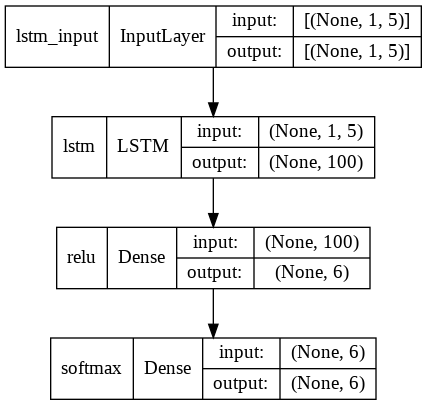

In [ ]:
import tensorflow as tf

dot_img_file = 'model.png'
tf.keras.utils.plot_model(model,to_file=dot_img_file,show_shapes=True)

## Сохранение параметров обучения

In [ ]:
json_save = model.to_json()
f = open('trained_commands.json','w')
f.write(json_save)
f.close()
model.save_weights('trained_commands.hdf')


## Создание тестовых данных
*если у вас нет test.txt*

In [ ]:
test_range = 1000
X_test = []
y_test = []

for i in range(test_range):
  X_test.append([numpy.random.randint(0,len(alphabet)-1) for x in range(5)])
  y_test.append(numpy.random.randint(1,6))

In [ ]:
X_test[:5]

[[22, 12, 8, 18, 20],
 [15, 13, 10, 13, 12],
 [9, 13, 20, 10, 0],
 [21, 12, 12, 11, 2],
 [9, 9, 17, 13, 13]]

In [ ]:
y_test[:5]

[1, 2, 1, 2, 2]

In [ ]:
testfile = open('test.txt', 'w')
for i in range(test_range):
  line = ''
  for x in X_test[i]:
    line += str(alphabet[x])
  line += ' '
  for y in digit_movements:
    if digit_movements[y] == y_test[i]:
      line += str(y)
  testfile.write(line + "\n")
testfile.close()

# Программа 2

## Загрузка параметров обучения

In [ ]:
from keras.models import model_from_json

json_load = open('trained_commands.json', 'r')
loaded_model_json = json_load.read()
json_load.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('trained_commands.hdf')
loaded_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print("Модель загружена")

Модель загружена


## Чтение тестовых данных

In [ ]:
test = open('test.txt')
X_test = []
y_test = []
for line in test:
  command = line.split()[0]
  movement  = line.split()[1]

  digits_command = []
  digit_movements = {'L': 1, 'R': 2, 'F': 3, 'B': 4, 'S': 5}
  digit_movement = 5
  X_test.append([alphabet.index(char) for char in command[:5]])
  y_test.append(digit_movements[movement])

## Обучение загруженной модели

In [ ]:
Xtest = numpy.reshape(X_test, (len(X_test), 1, seq_length))
Xtest = Xtest / float(len(alphabet))
ytest = np_utils.to_categorical(y_test)

In [ ]:
y = np_utils.to_categorical(y_train)

In [ ]:
loaded_model.fit(X, y, epochs=50, validation_data=(Xtest, ytest))

Epoch 1/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9569 - accuracy: 0.6554 - val_loss: 5.6709 - val_accuracy: 0.2100
Epoch 2/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9567 - accuracy: 0.6546 - val_loss: 5.6775 - val_accuracy: 0.2100
Epoch 3/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9565 - accuracy: 0.6552 - val_loss: 5.6110 - val_accuracy: 0.2130
Epoch 4/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9565 - accuracy: 0.6550 - val_loss: 5.6742 - val_accuracy: 0.2170
Epoch 5/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9562 - accuracy: 0.6554 - val_loss: 5.6907 - val_accuracy: 0.2130
Epoch 6/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9560 - accuracy: 0.6551 - val_loss: 5.7783 - val_accuracy: 0.2140
Epoch 7/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9557 - accuracy: 0.6554 - val_loss: 5.7425 - val_accuracy:

In [ ]:
results = loaded_model.evaluate(Xtest,ytest)

32/32 [==============================] - 0s 2ms/step - loss: 6.4622 - accuracy: 0.2100


In [ ]:
predicted = loaded_model.predict(Xtest)
errors = 0
for i in range(len(ytest)):
  if (predicted[i].argmax() != ytest[i].argmax()):
    errors += 1

print(f"Количество ошибок в предсказаниях: {errors}/{len(ytest)}")

Количество ошибок в предсказаниях: 790/1000
